In [53]:
## Create a tmp file containing only the lines containing "Bilayer Surface Tension" and the corresponding values

import os
import glob
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from itertools import cycle
# Change the default pyplot parameters to put a readable size of text
params = {'legend.fontsize': 'xx-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}
plt.rcParams.update(params)

In [48]:

labels = []
files = glob.glob('Results/lipid6FracTest/*/dmpcas.*')
tmp_files = []
for i in range(len(files)):
    labels.append(str(files[i].strip().split('/')[0:3]).strip().split('_')[-1][:-2])
    tmp_files.append(str(str(('/').join(files[i].split('/')[0:3])) + '/' + str(files[i].split('.')[-1]) + '.tmp'))
    if os.path.exists(tmp_files[i]):
        os.system(f'rm { tmp_files[i] }')
    os.system('grep -A 1 "Bilayer Surface Tension" {} > {}'.format(files[i], tmp_files[i]))

labelValue = {}
for i in range(len(files)):
    with open(tmp_files[i], 'rt') as rf:
        localLines = []
        for line in rf:
            line = (line.strip().split())[0]
            localLines.append(line)
        goodLines = []
        for ind in range(1,60,3):
            goodLines.append(float(localLines[ind]))
        labelValue[labels[i]] = goodLines

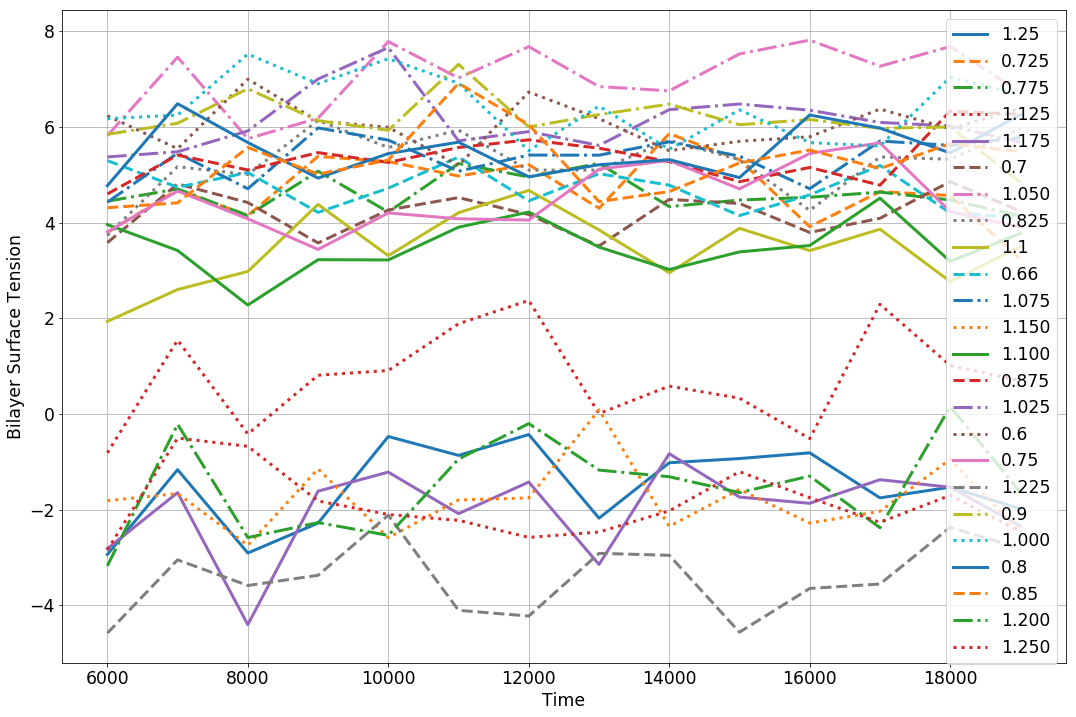

In [51]:
x_axis = list(range(1000, 21000, 1000))

# Changes the line type for each lines
lines = ["-","--","-.",":"]
linecycler = cycle(lines)

plt.figure(figsize=(18,12))
for label in labels:
    plt.plot(x_axis[5:-1], labelValue[label][5:-1], next(linecycler), linewidth=3)
plt.legend(labels)
plt.grid()
plt.xlabel('Time')
plt.ylabel('Bilayer Surface Tension')
plt.show()

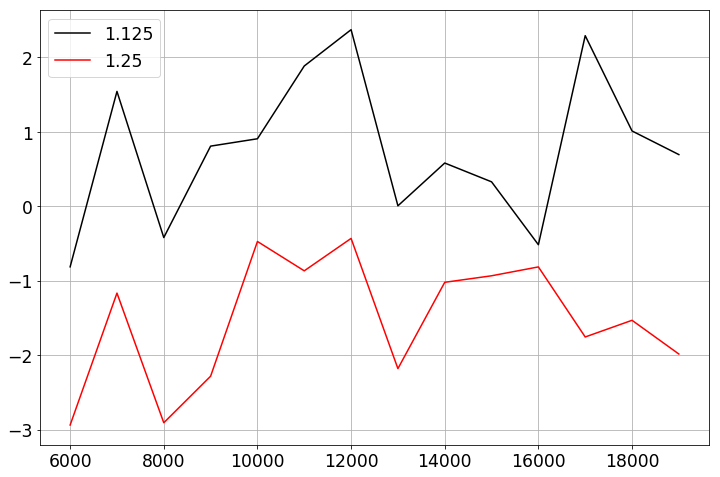

In [52]:
plt.figure(figsize=(12,8))
plt.plot(x_axis[5:-1],labelValue['1.125'][5:-1], 'k', x_axis[5:-1], labelValue['1.25'][5:-1], 'r')
plt.grid()
plt.legend(['1.125','1.25'])
plt.show()

In [75]:
Test = pd.DataFrame.from_dict(labelValue, orient='columns')
Test.drop([0,1,2,3,4,5], inplace=True)
labelMean = Test.mean().sort_values()
labelMean

1.225   -3.236805
1.175   -1.928428
1.250   -1.864585
1.150   -1.748561
1.25    -1.445161
1.200   -1.390856
1.125    0.824491
1.1      3.593145
1.100    3.607440
0.7      4.258910
0.75     4.497030
0.66     4.618408
0.775    4.635550
0.725    4.815101
0.85     5.269781
0.825    5.319622
0.875    5.415948
1.075    5.515983
0.8      5.569681
0.9      6.029807
0.6      6.055837
1.025    6.194434
1.000    6.484260
1.050    7.036868
dtype: float64

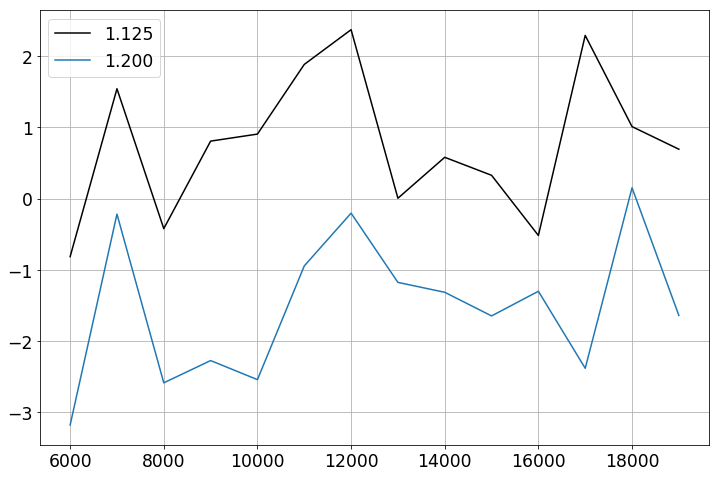

'Mean 1.125: '

0.8244912544428572

'Mean 1.200: '

-1.3908558314285713

In [79]:
plt.figure(figsize=(12,8))
plt.plot(x_axis[5:-1],labelValue['1.125'][5:-1], 'k', x_axis[5:-1], labelValue['1.200'][5:-1])
plt.grid()
plt.legend(['1.125','1.200'])
plt.show()
display('Mean 1.125: ',labelMean['1.125'])
display('Mean 1.200: ',labelMean['1.200'])


Thus, we'll now want to iterate between 1.125 and 1.200, until the value of label Mean reach roughly 0.1, as recommended by the teacher.